In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


In [39]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded)))
df.head()


Saving stroop_data.csv to stroop_data (10).csv


,participant_id,accuracy_percent,avg_reaction_time_sec,notes_optional
0,P01,97.9,1.90,NaN
1,P02,96.5,1.60,NaN
2,P03,100.0,1.35,NaN
3,P04,98.5,1.32,NaN
4,P05,98.6,1.23,NaN


from matplotlib import pyplot as plt
_df_0['accuracy_percent'].plot(kind='hist', bins=20, title='accuracy_percent')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['avg_reaction_time_sec'].plot(kind='hist', bins=20, title='avg_reaction_time_sec')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('participant_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='accuracy_percent', y='avg_reaction_time_sec', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['accuracy_percent'].plot(kind='line', figsize=(8, 4), title='accuracy_percent')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['avg_reaction_time_sec'].plot(kind='line', figsize=(8, 4), title='avg_reaction_time_sec')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['participant_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='accuracy_percent', y='participant_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['participant_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='avg_reaction_time_sec', y='participant_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

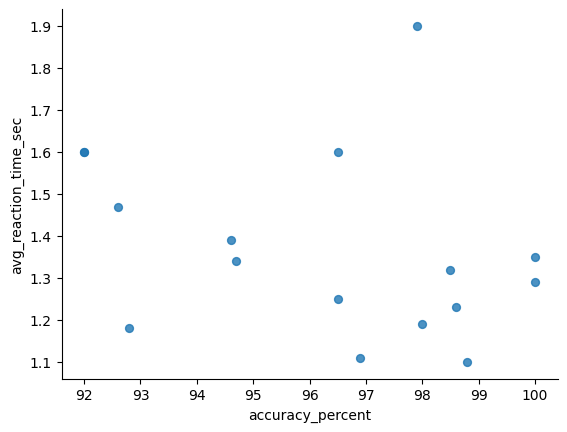

In [41]:
# @title accuracy_percent vs avg_reaction_time_sec

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='accuracy_percent', y='avg_reaction_time_sec', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [40]:
# Convert reaction time to ms if needed
df["avg_reaction_time_ms"] = df["avg_reaction_time_sec"] * 1000

# Manual labeling function (example)
def assign_label(row):
    if row["avg_reaction_time_ms"] <= 1300:
        return 2  # High
    elif row["avg_reaction_time_ms"] <= 1500:
        return 1  # Medium
    else:
        return 0  # Low

df["label"] = df.apply(assign_label, axis=1)
print("Labeled Data:")
print(df)
print("\nLabel distribution:")
print(df["label"].value_counts())


Labeled Data:
   participant_id  accuracy_percent  avg_reaction_time_sec  notes_optional  \
0             P01              97.9                   1.90             NaN   
1             P02              96.5                   1.60             NaN   
2             P03             100.0                   1.35             NaN   
3             P04              98.5                   1.32             NaN   
4             P05              98.6                   1.23             NaN   
5             P06              98.8                   1.10             NaN   
6             P07             100.0                   1.29             NaN   
7             P08              96.9                   1.11             NaN   
8             P09              98.0                   1.19             NaN   
9             P10              94.6                   1.39             NaN   
10            P11              92.0                   1.60             NaN   
11            P12              92.6               

                Feature        Value
0         Accuracy Mean    96.275000
1          Accuracy Std     2.804877
2          Accuracy Min    92.000000
3          Accuracy Max   100.000000
4       Accuracy Median    96.700000
5           Accuracy Q1    94.150000
6           Accuracy Q3    98.525000
7    Reaction Time Mean  1370.000000
8     Reaction Time Std   216.517898
9  Reaction Time Median  1330.000000


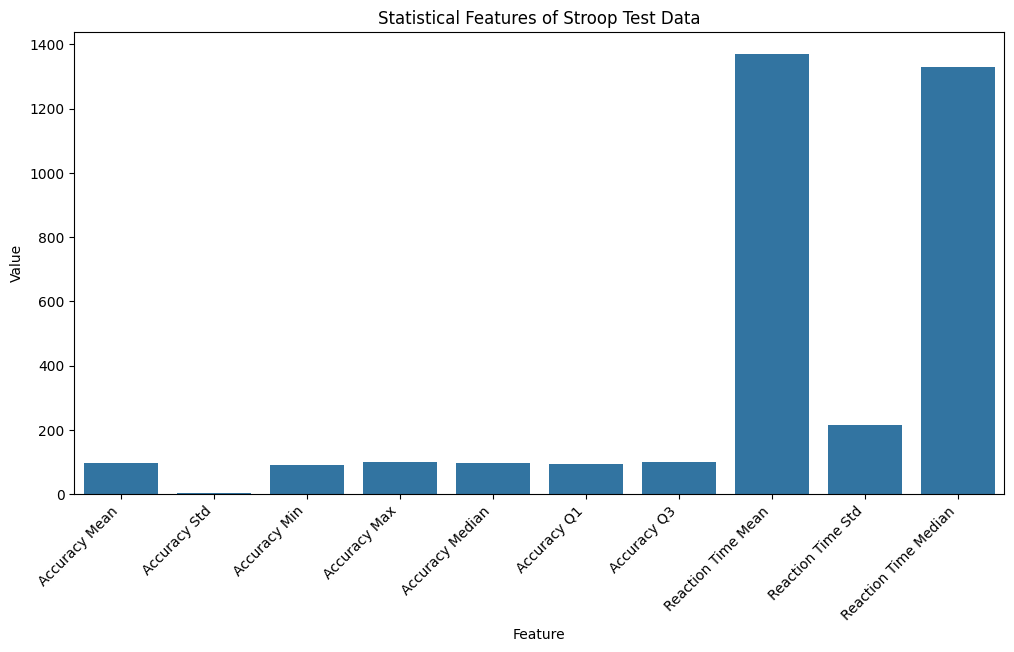

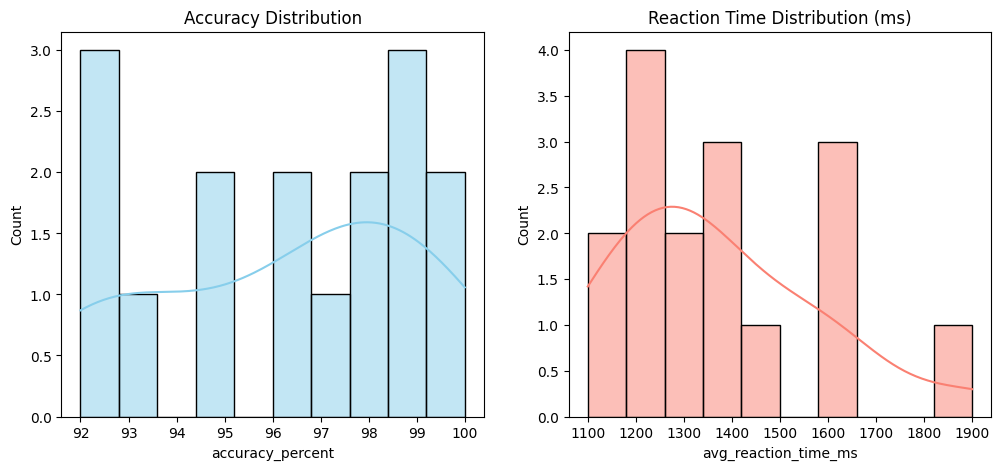

In [32]:
# 10 statistical features: accuracy + reaction time
features = {}
# Accuracy
if "accuracy_percent" in df.columns:
    features["Accuracy Mean"] = df["accuracy_percent"].mean()
    features["Accuracy Std"] = df["accuracy_percent"].std()
    features["Accuracy Min"] = df["accuracy_percent"].min()
    features["Accuracy Max"] = df["accuracy_percent"].max()
    features["Accuracy Median"] = df["accuracy_percent"].median()
    features["Accuracy Q1"] = df["accuracy_percent"].quantile(0.25)
    features["Accuracy Q3"] = df["accuracy_percent"].quantile(0.75)

# Reaction Time
features["Reaction Time Mean"] = df["avg_reaction_time_ms"].mean()
features["Reaction Time Std"] = df["avg_reaction_time_ms"].std()
features["Reaction Time Median"] = df["avg_reaction_time_ms"].median()

# Show table
features_df = pd.DataFrame(list(features.items()), columns=["Feature", "Value"])
print(features_df)

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="Feature", y="Value", data=features_df)
plt.xticks(rotation=45, ha="right")
plt.title("Statistical Features of Stroop Test Data")
plt.show()

# Distribution plots
plt.figure(figsize=(12,5))
if "accuracy_percent" in df.columns:
    plt.subplot(1,2,1)
    sns.histplot(df["accuracy_percent"], bins=10, kde=True, color="skyblue")
    plt.title("Accuracy Distribution")

plt.subplot(1,2,2)
sns.histplot(df["avg_reaction_time_ms"], bins=10, kde=True, color="salmon")
plt.title("Reaction Time Distribution (ms)")
plt.show()


In [33]:
X = df[["avg_reaction_time_ms"]].values  # Add "accuracy_percent" if available
y = df["label"].values

# Stratify if all classes have ≥2 samples
min_samples = df["label"].value_counts().min()
stratify_param = y if min_samples >= 2 else None

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=stratify_param
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Train labels:", np.unique(y_train, return_counts=True))
print("Test labels:", np.unique(y_test, return_counts=True))


Train labels: (array([0, 1, 2]), array([3, 4, 5]))
Test labels: (array([0, 1, 2]), array([1, 1, 2]))


In [34]:
nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=50, batch_size=4, verbose=0)

y_pred_nn = np.argmax(nn.predict(X_test), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


In [35]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [36]:
xgb = XGBClassifier(objective='multi:softmax', num_class=3, eval_metric='mlogloss', random_state=0)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


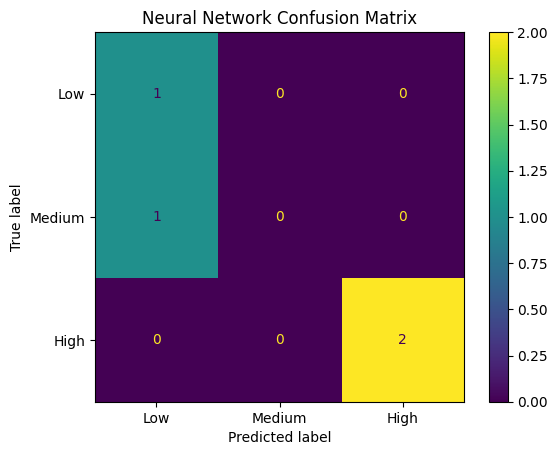

Neural Network Classification Report:

              precision    recall  f1-score   support

         Low       0.50      1.00      0.67         1
      Medium       0.00      0.00      0.00         1
        High       1.00      1.00      1.00         2

    accuracy                           0.75         4
   macro avg       0.50      0.67      0.56         4
weighted avg       0.62      0.75      0.67         4



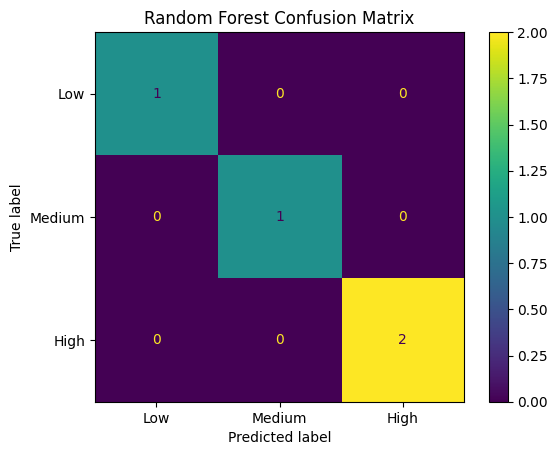

Random Forest Classification Report:

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         1
        High       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



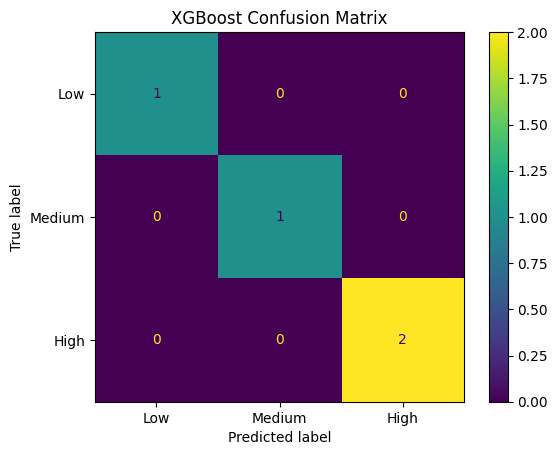

XGBoost Classification Report:

              precision    recall  f1-score   support

         Low       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         1
        High       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [37]:
labels = [0,1,2]
label_names = ["Low","Medium","High"]

for model_name, y_pred in [("Neural Network", y_pred_nn),
                           ("Random Forest", y_pred_rf),
                           ("XGBoost", y_pred_xgb)]:
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    ConfusionMatrixDisplay(cm, display_labels=label_names).plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print(f"{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, labels=labels, target_names=label_names, zero_division=0))
